# Veri Analizi(EDA)

Veri analizi veriyi daha iyi anlayıp alacağımız eylemlerde bize yardımcı olur ve modelimizi daha sağlıklı geliştirmemizi sağlar. 

### Normal Dağılım

![](![](2022-09-18-11-01-09.png).png)

Standart sapma, Olasılık kuramı ve istatistik bilim dallarında, bir anakütle, bir örneklem, bir olasılık dağılımı veya bir rassal değişken, veri değerlerinin yayılımının özetlenmesi için kullanılan bir ölçüdür. 

![](2022-09-18-11-45-56.png)

![](2022-09-18-11-45-37.png)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings as w

import scipy

w.simplefilter('ignore')

df=pd.read_csv('data/2/lessons.csv')
df

,Maths,English,History
0,67.970442,60.990250,72.200954
1,58.438226,64.157607,62.687182
2,82.354172,62.998874,50.171015
3,72.909983,64.255032,62.686110
4,81.140560,64.819401,57.546319
...,...,...,...
95,74.213807,63.560375,61.818509
96,59.246592,61.550311,45.822713
97,71.235386,61.375859,72.944808
98,65.394186,61.635397,68.136102


Maths:0.55029
English:3e-05
History:7e-05


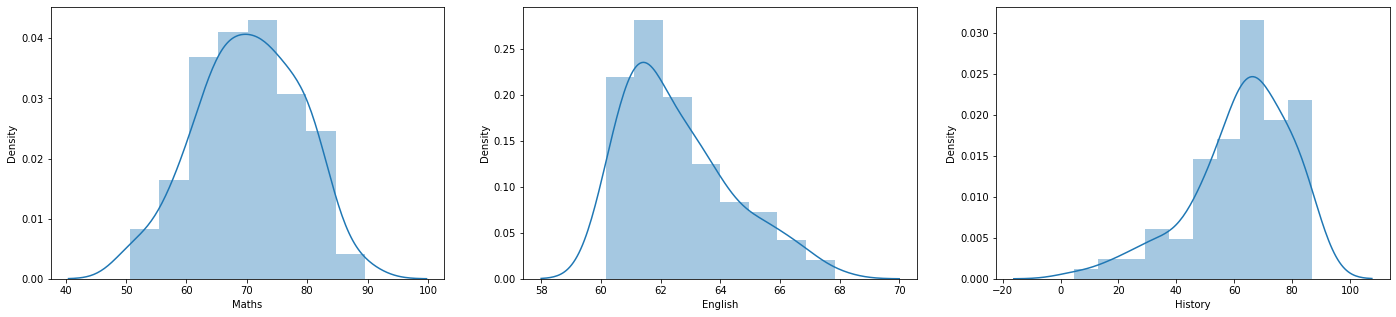

In [2]:
fig,a=plt.subplots(1,3,figsize=(24,5))
a[0]=sbn.distplot(df.Maths,ax=a[0])
a[1]=sbn.distplot(df.English,ax=a[1])
a[2]=sbn.distplot(df.History)

for i in df.columns:
    _,p=scipy.stats.shapiro(df[i])
    print(f'{i}:{round(p,5)}')

In [3]:
print('Maths:\nSkew: ',scipy.stats.skew(df.Maths))
print('Kurtosis: ',scipy.stats.kurtosis(df.Maths))
print('\n')
print('English:\nSkew: ',scipy.stats.skew(df.English))
print('Kurtosis: ',scipy.stats.skew(df.English))
print('\n')
print('History:\nSkew: ',scipy.stats.skew(df.History))
print('Kurtosis: ',scipy.stats.skew(df.History))

Maths:
Skew:  -0.18240961883219445
Kurtosis:  -0.4462956811237584


English:
Skew:  0.8389518711338784
Kurtosis:  0.8389518711338784


History:
Skew:  -0.9709256918774571
Kurtosis:  -0.9709256918774571


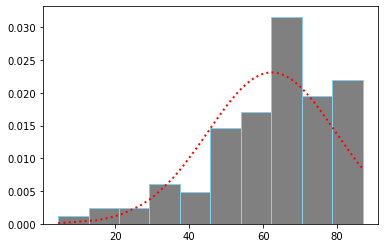

In [4]:
tarih = df.History.sort_values()
mean, std = scipy.stats.norm.fit(tarih, loc=0)
pdf_norm=scipy.stats.norm.pdf(tarih, mean, std)

plt.hist(tarih, bins='auto', density = True
        ,color = "grey", ec="skyblue")
plt.plot(tarih, pdf_norm, label='Dağılım Eğrisi'
        ,color = "red", linewidth=2, linestyle=':')

### Logaritmik Dönüşüm (Log Transformation)

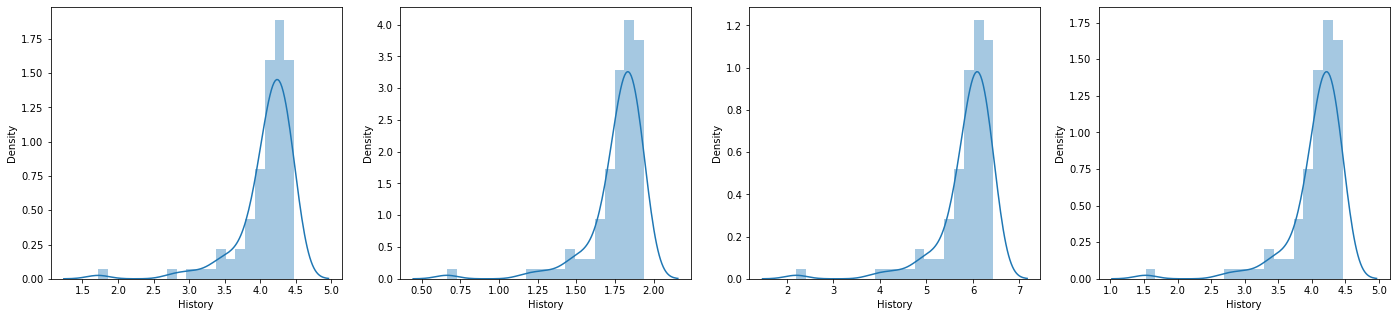

In [5]:
fig,a=plt.subplots(1,4,figsize=(24,5))
a[0]=sbn.distplot(np.log1p(df.History),bins=20,ax=a[0])
a[1]=sbn.distplot(np.log10(df.History),bins=20,ax=a[1])
a[2]=sbn.distplot(np.log2(df.History),bins=20,ax=a[2])
a[3]=sbn.distplot(np.log(df.History),bins=20)

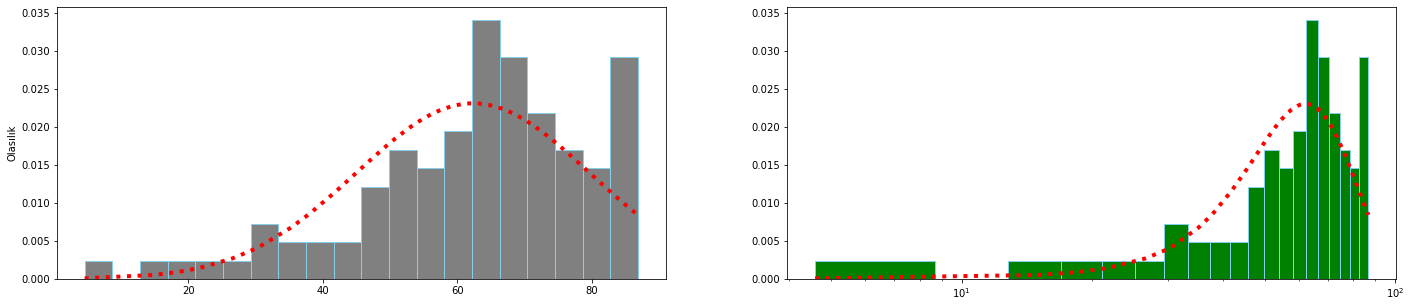

In [6]:
mean, std = scipy.stats.norm.fit(tarih, loc=0)
pdf_norm = scipy.stats.norm.pdf(tarih, mean, std)

shape, loc, scale = scipy.stats.lognorm.fit(tarih, loc=0)
pdf_lognorm = scipy.stats.lognorm.pdf(tarih, shape, loc, scale)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 5))
ax1.hist(tarih, bins= 20 , density=True
        ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
        ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')

ax2.hist(tarih, bins= 20, density=True
        ,color = "green", ec="skyblue")

ax2.plot(tarih, pdf_lognorm
        ,color = "red", linewidth=4, linestyle=':')

ax2.set_xscale('log')

plt.show()

### Karekök Dönüşümü (Square-Root Transformation)

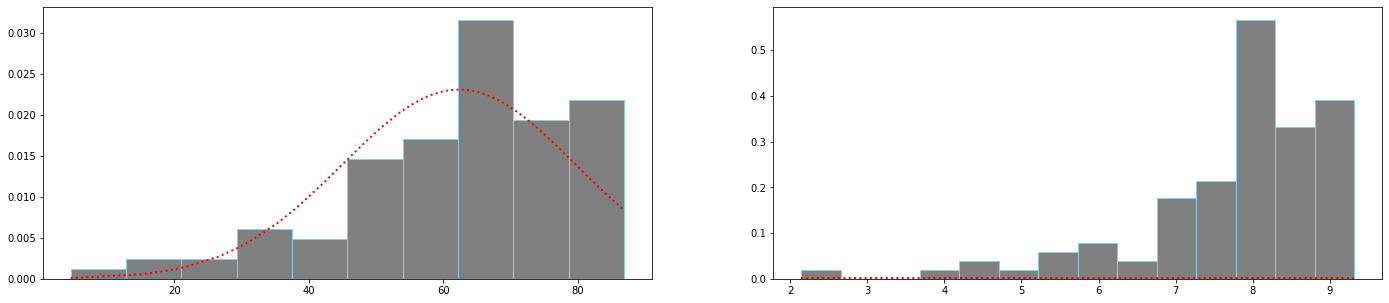

In [7]:
tarih_kk=tarih**(1/2)
shape, loc, scale = scipy.stats.lognorm.fit(tarih_kk, loc=0)
pdf_norm_kk = scipy.stats.norm.pdf(tarih_kk, shape, scale)

fig,a=plt.subplots(1,2,figsize=(24,5))

a[0].hist(tarih, bins='auto', density = True
        ,color = "grey", ec="skyblue")
a[0].plot(tarih, pdf_norm, label='Dağılım Eğrisi'
        ,color = "red", linewidth=2, linestyle=':')

a[1].hist(tarih_kk, bins='auto', density = True
        ,color = "grey", ec="skyblue")
a[1].plot(tarih_kk, pdf_norm_kk, label='Dağılım Eğrisi'
        ,color = "red", linewidth=2, linestyle=':')

### Karşıt Dönüşüm (Reciprocal Transformation)

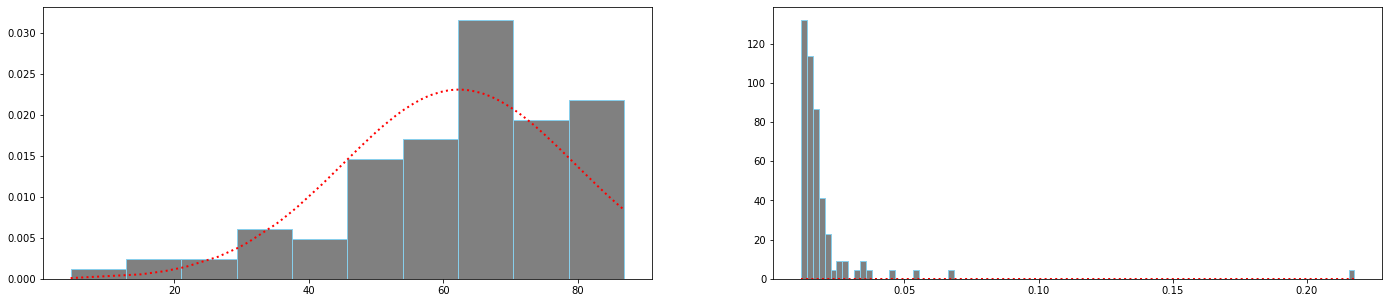

In [8]:
tarih_kk=1/tarih
shape, loc, scale = scipy.stats.lognorm.fit(tarih_kk, loc=0)
pdf_norm_kk = scipy.stats.norm.pdf(tarih_kk, shape, scale)

fig,a=plt.subplots(1,2,figsize=(24,5))

a[0].hist(tarih, bins='auto', density = True
        ,color = "grey", ec="skyblue")
a[0].plot(tarih, pdf_norm, label='Dağılım Eğrisi'
        ,color = "red", linewidth=2, linestyle=':')

a[1].hist(tarih_kk, bins='auto', density = True
        ,color = "grey", ec="skyblue")
a[1].plot(tarih_kk, pdf_norm_kk, label='Dağılım Eğrisi'
        ,color = "red", linewidth=2, linestyle=':')

### Box-Cox

lambda:  1.8726255290474518


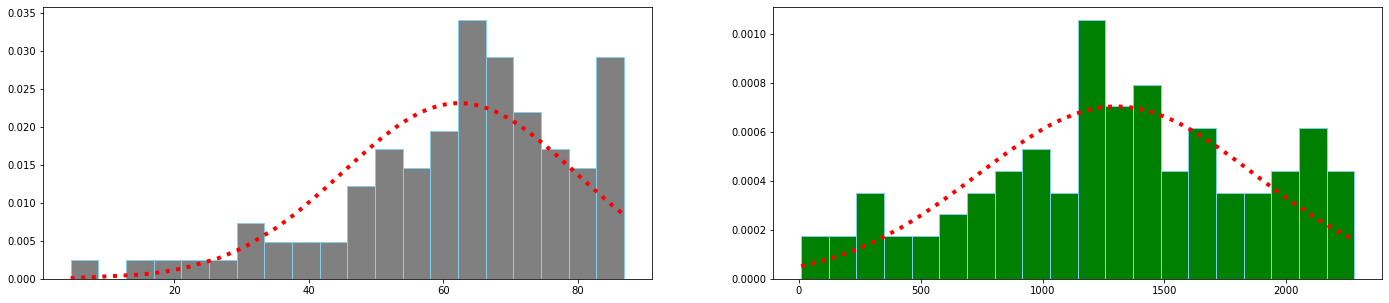

In [9]:
tarih_sr, lam = scipy.stats.boxcox(tarih)
print('lambda: ',lam)

mean, std = scipy.stats.norm.fit(tarih, loc=0)
pdf_norm = scipy.stats.norm.pdf(tarih, mean, std)


mean, std = scipy.stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = scipy.stats.norm.pdf(tarih_sr, mean, std)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 5))

ax1.hist(tarih, bins= 20 , density=True
        ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
        ,color = "red", linewidth=4, linestyle=':')

ax2.hist(tarih_sr, bins= 20, density=True
        ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
        ,color = "red", linewidth=4, linestyle=':')


**Box-Cox için lambda değeri (-5,5) arasında yer alır. Buna göre de dönüşüm türleri aşağıdadır.**


lambda = -1 Karşıt (Reciprocal) Dönüşüm

lambda = -0.5 Karşıt Karekök Dönüşümü

lambda = 0.0 Logaritmik Dönüşüm

lambda = 0.5 Karekök Dönüşümü

lambda = 1.0 Dönüşüm Yok

## Aykırı Veriler

In [10]:
df.describe()
#std*3 +- mean

,Maths,English,History
count,100.000000,100.000000,100.000000
mean,70.260026,62.564380,62.306433
std,8.490178,1.813402,17.354135
min,50.592003,60.160859,4.592358
25%,64.705280,61.284863,53.810693
50%,70.277253,62.167855,64.672982
75%,76.986152,63.591046,74.121710
max,89.627868,67.829394,86.833889


In [11]:
df.History.std()*3

52.06240619600656

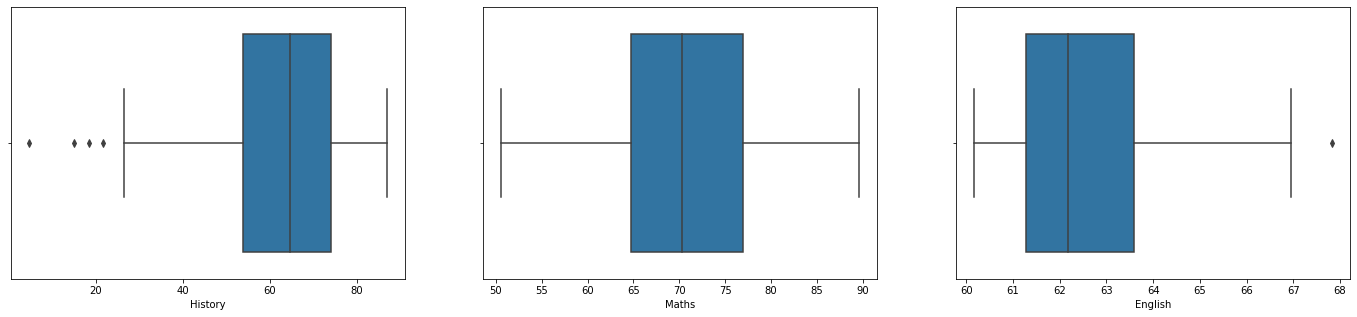

In [12]:
fig,a=plt.subplots(1,3,figsize=(24,5))

a[0] = sbn.boxplot(df.History,ax=a[0])
a[1] = sbn.boxplot(df.Maths,ax=a[1])
a[2] = sbn.boxplot(df.English,ax=a[2])

# Grafik Türleri

# Kopya

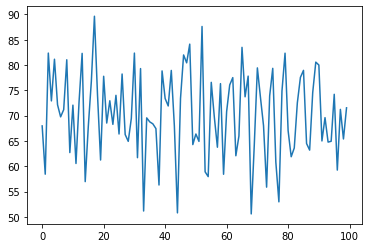

In [14]:
plt.plot(df.Maths)

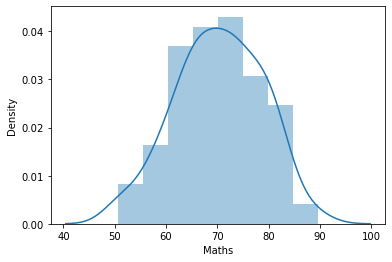

In [22]:
sbn.distplot(df.Maths)

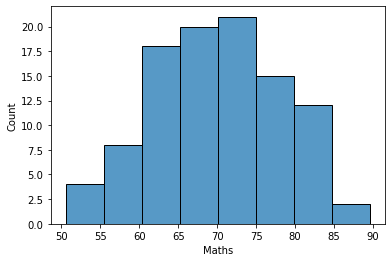

In [23]:
sbn.histplot(df.Maths)

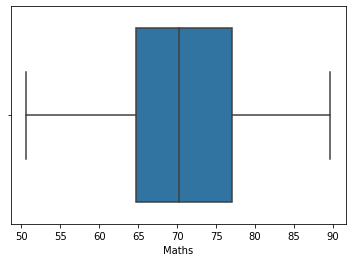

In [29]:
sbn.boxplot(df.Maths)

In [4]:
titanic=pd.read_csv('data/2/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


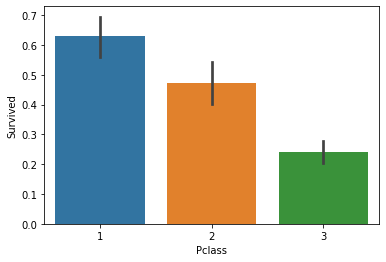

In [41]:
sbn.barplot(x='Pclass',y='Survived', data=titanic)

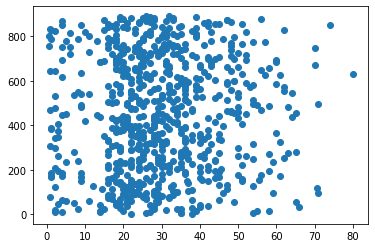

In [47]:
plt.scatter(titanic.Age,titanic.PassengerId)

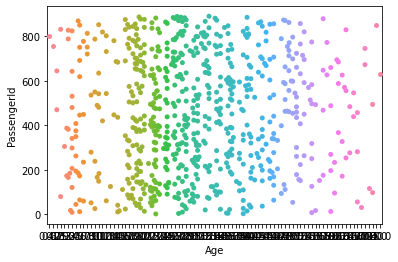

In [7]:
sbn.swarmplot(titanic.Age,titanic.PassengerId)

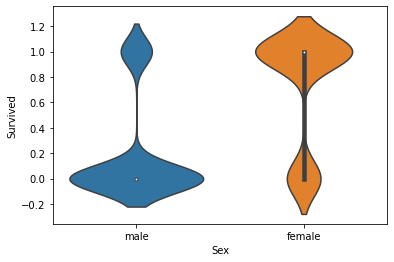

In [10]:
sbn.violinplot(titanic.Sex,titanic.Survived)

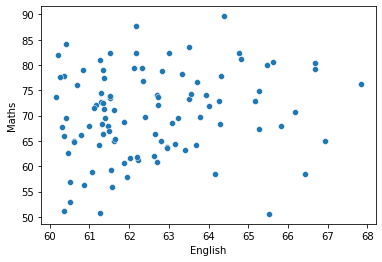

In [15]:
sbn.scatterplot(x='English',y='Maths',data=df)

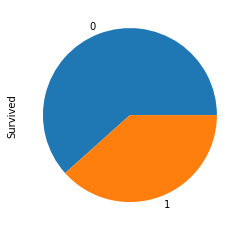

In [18]:
titanic.Survived.value_counts().plot(kind='pie')

# Scaling

In [132]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

minmax=MinMaxScaler()
mm=minmax.fit_transform(np.array(df.Maths).reshape(-1, 1))
mm=pd.DataFrame(mm,columns=['Maths'])
mm

,Maths
0,0.445192
1,0.201000
2,0.813666
3,0.571730
4,0.782577
...,...
95,0.605131
96,0.221709
97,0.528831
98,0.379194


In [131]:
minmax=MaxAbsScaler()
mm=minmax.fit_transform(np.array(df.Maths).reshape(-1, 1))
mm=pd.DataFrame(mm,columns=['Maths'])
mm

            Maths
count  100.000000
mean     0.783908
std      0.094727
min      0.564467
25%      0.721933
50%      0.784100
75%      0.858953
max      1.000000


,Maths
0,0.758363
1,0.652010
2,0.918846
3,0.813474
4,0.905305
...,...
95,0.828022
96,0.661029
97,0.794791
98,0.729619


In [136]:
minmax=RobustScaler()
mm=minmax.fit_transform(np.array(df.Maths).reshape(-1, 1))
mm=pd.DataFrame(mm,columns=['Maths'])
mm

,Maths
0,-0.187838
1,-0.964022
2,0.983393
3,0.214376
4,0.884571
...,...
95,0.320544
96,-0.898199
97,0.078018
98,-0.397616


In [133]:
minmax=StandardScaler()
mm=minmax.fit_transform(np.array(df.Maths).reshape(-1, 1))
mm=pd.DataFrame(mm,columns=['Maths'])
mm

,Maths
0,-0.271033
1,-1.399424
2,1.431663
3,0.313693
4,1.288000
...,...
95,0.468035
96,-1.303732
97,0.115460
98,-0.576001
